# 1. Group 12 Final Report

STAT 301 - Group 12 - April 16, 2025

*Manya Jain: 22206486 | Kyle Jones: 82804451 | Omair Ahmed: 17176405 | Eddie: 18141721*

## 2. Introduction 

In today’s digital era, food delivery platforms like DoorDash have transformed how consumers interact with restaurants. With countless options at their fingertips, customers often face the daunting task of selecting a restaurant that delivers not just food, but a satisfying culinary experience. While factors such as cuisine type or price may influence choices, customer ratings serve as a critical indicator of restaurant quality, reflecting collective feedback from past diners.

This project seeks to explore the association between customer ratings and various restaurant characteristics using real-world DoorDash data. Specifically, we aim to answer the question:

**How are customer ratings on DoorDash associated with restaurant features such as price range, number of reviews, distance from the customer, city, and restaurant category?**

This question involves both inferential and predictive goals. From an inferential standpoint, we examine how restaurant characteristics—such as price range, number of reviews, distance, city, and category—are associated with customer ratings. This helps identify trends, like whether higher-priced or closer restaurants tend to receive better reviews. On the predictive side, we use these variables to estimate a restaurant’s expected rating, offering value to new restaurants forecasting customer perception and to platforms optimizing recommendation systems.

Luca (2016) showed that a one-star increase in Yelp ratings can boost independent restaurant revenue by 5–9%, underscoring the impact of customer reviews. Building on this, our study examines how restaurant characteristics on DoorDash relate to ratings, extending these insights to the food delivery space.

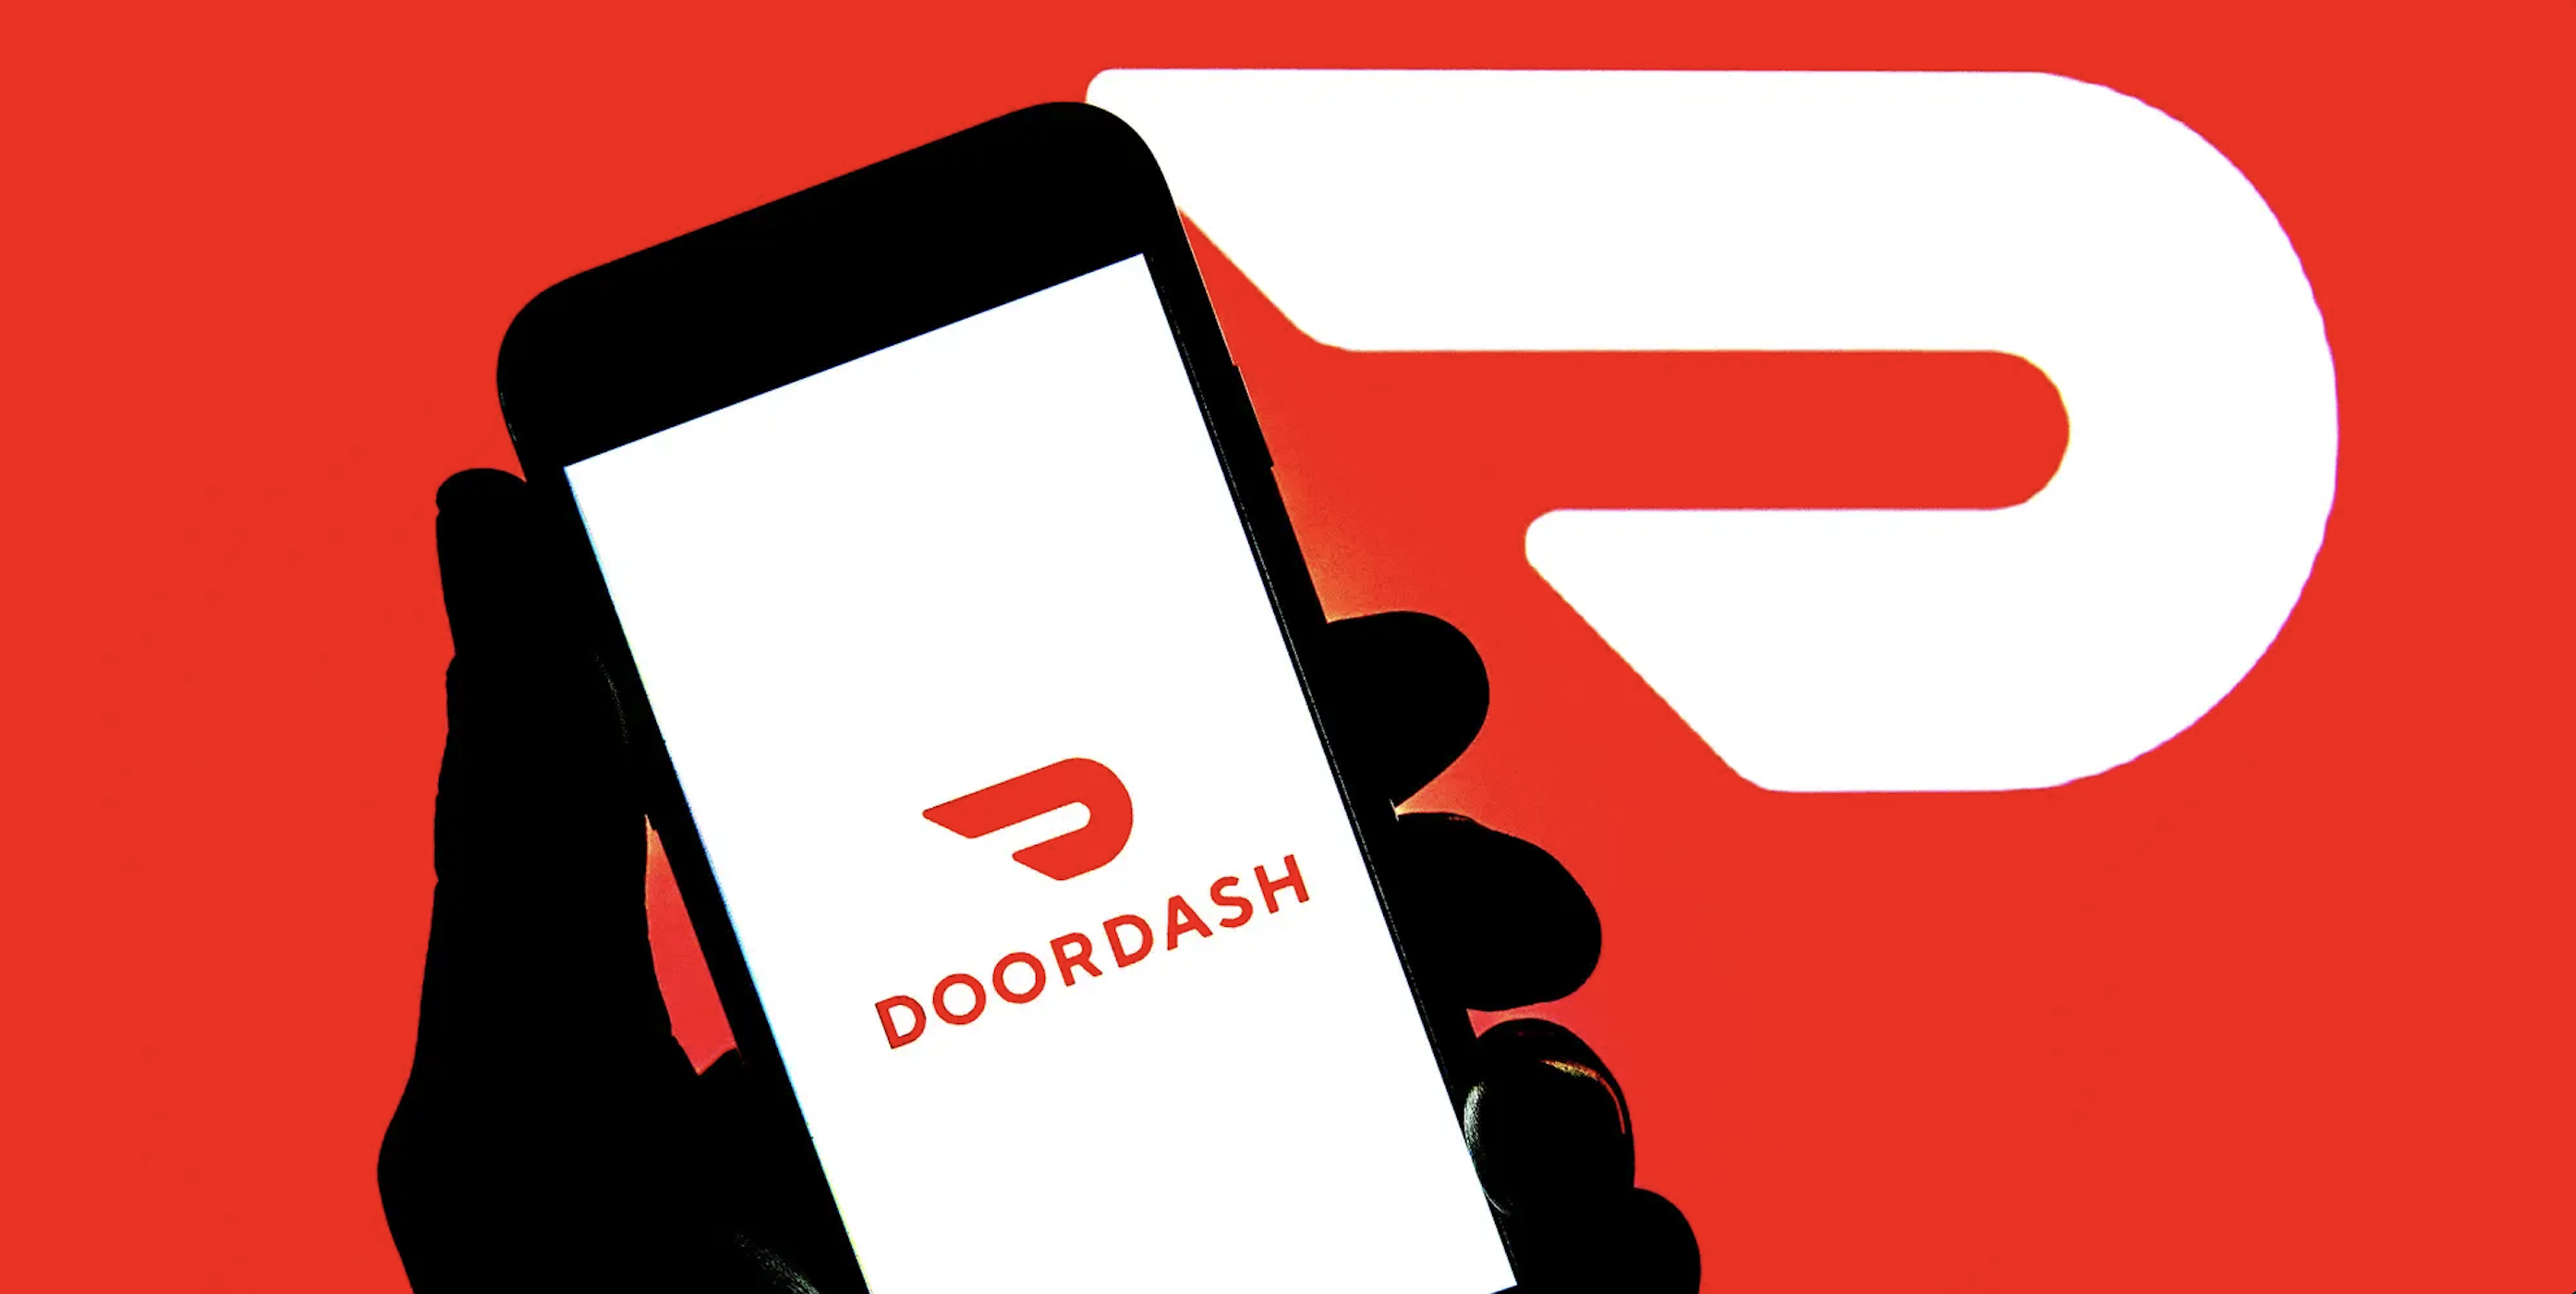

## 3. Methods and Results

### Loading The Packages
Firstly, we load the required packages in R to gain access to useful functions for performing the data analysis.

In [1]:
library(MASS)
library(dplyr)
library(tidyverse)
library(knitr)
library(r
library(gridExtra)

set.seed(1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## 3.A Data

- ### Reading the Dataset

We will name our dataset `doordash_data`

We load the dataset from the link "https://raw.githubusercontent.com/MANYAdsci/STAT301_Project/refs/heads/main/cleaned_full_data.csv" in GITHUB by using the read_csv function.

In [2]:
doordash_data <- read_csv("https://raw.githubusercontent.com/MANYAdsci/STAT301_Project/refs/heads/main/cleaned_full_data.csv")
head(doordash_data)
nrow(doordash_data)

ERROR: Error in read_csv("https://raw.githubusercontent.com/MANYAdsci/STAT301_Project/refs/heads/main/cleaned_full_data.csv"): could not find function "read_csv"


We observe that the dataset has **10 columns** and **3290 rows**

- ### Source of Data

The dataset used is picked from Kaggle (https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash) and contains food delivery data from DoorDash. It contains information about restaurants with under 30 minutes of delivery time using the iconic place address in downtown for each populous city in Canada.

- ### Data Collection
The data was collected from Door Dash website (https://www.doordash.com/) with selenium on Python and this cleaned_full_data.csv was made on https://www.kaggle.com/code/satoshiss/clean-restaurant-raw-data?scriptVersionId=97393753 from the other raw files.

The iconinc place address in Downtown for each city used are as follows:
1. Toronto Rogers Center : 1 Blue Jays Way, Toronto, ON M5V 1J1
2. Montreal The Montreal Museum of Fine Arts :1380 Sherbrooke St W, Montreal, Quebec H3G 1J5
3. Calgary Calgary Tower: 101 9 Ave SW, Calgary, AB T2P 1J9
4. Edmonton Rogers Place:10220 104 Ave NW, Edmonton, AB T5J 0H6
5. Ottawa Parliment Hill: Wellington St, Ottawa, ON K1A 0A9
6. Winnipeg Millennium Library (Winnipeg Public Library main branch) 251 Donald St, Winnipeg, MB R3C 3P5
7. Vancouver Vancouver Public Library, Central Library 350 W Georgia St, Vancouver, BC V6B 6B1
8. Downtown Brampton BIA 7 Queen St W, Brampton, ON L6Y 1L9

- ### Variables
The dataset has **10 variables** as follows:

In [ ]:
variable_table <- data.frame(
  `Variable Name` = c("...1", "restaurant", "url", "distance", "star", "num_reviews", "city", "price_range", "category_1", "category_2"),
  Type = c("Integer", "String", "String", "Float", "Float", "Float", "String", "String", "String", "String"),
  Description = c(
    "Index of the dataset",
    "Restaurant name",
    "Restaurant menu page URL",
    "Distance from the place to make an order (miles)",
    "How favorable out of 5 stars",
    "Number of reviews",
    "The city where an order was placed",
    "Price range",
    "Primary category of the restaurant",
    "Secondary category of the restaurant"
  )
)
kable(variable_table, caption = "Table 1: Variables and Description")


#### Variables used in Analysis

**Response Variable (Y):**
- *Star (Continuous)*: Customer rating of the restaurant (out of 5).

**Explanatory Variables (X1, X2, ...):**
- *Price Range (Categorical)*: Examines whether different price categories are associated with different average ratings.
- *Number of Reviews (Continuous)*: Investigates if restaurants with more reviews tend to have higher/lower ratings.
- *Distance (Continuous)*: Explores whether proximity to the order location is linked to higher or lower ratings.
- *City (Categorical)*: Analyzes if ratings vary by location.
- *Category_1 and Category_2 (Categorical)*: Checks if certain types of restaurants tend to receive different ratings.

- ### Pre-selection of Variables
The variables that can be dropped are as follows:
- `...1` and `url`: Irrelevant for analysis; ...1 is just an index, and url is only a hyperlink with no predictive value.
- `restaurant`: Not used since it's a unique identifier and doesn’t contribute to generalizable insights.
<!-- - `category_1` and `category_2`: Excluded due to high cardinality (274 and 262 unique values respectively), making them unsuitable for regression without overfitting or losing interpretability.  Furthere, there is no clear indication how the two categories differ from each other. -->

## 3.B Exploratory Data Analysis

We will first analyse the data from a high-level using `summary` and `glimpse` functions to obtain a baseline understanding of the data found within the dataset.

- ### Exploring the Data

In [ ]:
summary(doordash_data)
glimpse(doordash_data)

In [ ]:
colSums(is.na(doordash_data))

- ### Cleaning and Wrangling

We now clean and wrangle the data into a tidy format and store the final cleaned data as `doordash_data_final`.

In [ ]:
doordash_data_final <- doordash_data %>%
    select(-url) %>% 
    mutate(
        price_range = as.factor(price_range),
        city = as.factor(str_replace_all(city, "Branpton", "Brampton")),
        category_1 = as.factor(category_1),
        category_2 = ifelse(is.na(category_2), "Unknown", category_2), 
        category_2 = as.factor(category_2),
        distance = as.numeric(distance)
    ) %>%
    drop_na(star, num_reviews) 
# %>% 
# select(-c(...1, url)) 

In the cell above, we removed irrelevant columns (`index`, `url`) to clean the dataset. Categorical variables such as `price_range`, `city`, `category_1`, and `category_2` were converted to factors, with missing values in `category_2` replaced by `"Unknown"` to retain information. 

For numerical variables, including `distance`, `star`, and `num_reviews`, we ensured proper type conversion. Rows with missing values in `star` and `num_reviews` were removed to maintain data integrity. Additionally, we corrected a typo in the `city` column, replacing `"Branpton"` with `"Brampton"` for consistency. 

The final dataset is now structured and ready for further analysis.


In [ ]:
glimpse(doordash_data_final)

In [ ]:
num_categories_1 <- nlevels(as.factor(doordash_data_final$category_1))
num_categories_1

num_categories_2 <- nlevels(as.factor(doordash_data_final$category_2))
num_categories_2

- ### Data Visualisations

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)

plot <- ggplot(doordash_data_final, aes(x = num_reviews, y = star, color = price_range)) +
        geom_jitter(alpha = 0.5, width = 50, height = 0.1) +
        labs(title = "Relationship Between Number of Reviews and Star Ratings based on Price Range",
            x = "Number of Reviews",
            y = "Star Rating (out of 5)",
            color = "Price Range") +
        theme_minimal()+
        theme(plot.title = element_text(size = 16, face = "bold"),  
            axis.title = element_text(size = 14),
            legend.title = element_text(size = 14),
             legend.position = "top") +
        scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442")) +
        geom_smooth(method = "lm", se = FALSE, color = "black") 

plot

`Figure 1: Relationship Between Number of Reviews and Star Ratings based on Price Range`

The scatter plot reveals a slight positive correlation between the number of reviews and star ratings, suggesting that restaurants with more
reviews tend to maintain higher ratings. However, the effect is weak, as most ratings remain clustered between 4.0 and 5.0, with very few
falling below 3.0, indicating generally favorable customer satisfaction.

Price range does not appear to significantly influence ratings, as all pricing categories exhibit similar distributions. Most restaurants have fewer than 500 reviews, with only a few outliers receiving exceptionally high numbers.

Overall, while having a higher number of reviews may slightly associated with better ratings, pricing is not a strong factor in determining customer satisfaction. Highly-rated restaurants may naturally attract more reviews, reinforcing this observed correlation. Aspects like restaurant location, service quality, and promotions may also impact ratings but are not accounted for in this visualization.

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)

plot1 <- ggplot(doordash_data_final, aes(x = num_reviews, y = star)) +
    geom_jitter(aes(color = price_range), alpha = 0.6, width = 100, height = 0.1) + 
    labs(title = "Relationship Between Number of Reviews and Star Ratings by Price Range for populous cities in Canada",
        x = "Number of Reviews",
        y = "Star Rating (out of 5)",
        color = "Price Range") +
    theme_minimal() +
    theme(plot.title = element_text(size = 16, face = "bold"),  
        axis.title = element_text(size = 14),
        legend.title = element_text(size = 14),
         legend.position = "top") +
    scale_color_manual(values = c("#D55E00", "#56B4E9", "#009E73", "#E69F00")) +
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    facet_wrap(~city)

plot1

`Figure 2: Relationship Between Nubmer of Reviews and Star Ratings by Price Range for populous cities in Canada`

The plot builds upon the first visualisation by examining the number of reviews and star ratings across different cities in Canada, while also
differentiating price ranges. Each city is presented in a separate facet, allowing for a direct comparison of regional trends.

- Across all cities, restaurants with fewer reviews exhibit a wider range of ratings, while those with many reviews tend to cluster around higher star ratings.
- The trend lines suggest a slight positive correlation between the number of reviews and star ratings in most cities, indicating that popular restaurants generally maintain good ratings.
- Price range does not show a strong direct impact on ratings, but mid-range restaurants ($$) dominate across cities.
- Some cities, like Ottawa and Vancouver, display a nearly flat trend, suggesting that review count does not significantly impact average
- The variability in Brampton and Edmonton suggests a more pronounced effect of reviews on ratings compared to other cities.

Just as in the first plot, the price range of a restaurant does not appear to play a significant role in determining ratings, as similar rating distributions are observed across price categories but regional variations suggest that review count influences ratings differently across cities, making it a crucial factor to explore further.

## 3.C Methods and Plan

- ### Overall Methodology
We began by cleaning and preprocessing the dataset. To address our objective of predicting customer ratings based on restaurant characteristics, we employ a **Multiple Linear Regression (MLR)** model to adress the relationship between the `star` rating (response variable) and the various predictors.

To refine our model, we will apply **forward selection using the Akaike Information Criterion (AIC)**, which adds predictors one at a time based on the greatest reduction in AIC. This was followed by evaluating model assumptions using diagnostic plots and comparing adjusted R² across models.

- ### Justification of Methods
**Multiple Linear Regression** was chosen because our objective is to model a continuous outcome (`star` rating) as a function of multiple explanatory variables. MLR is a foundational method taught in STAT 301 and allows us to interpret the effect of each predictor on the outcome while controlling for others. 

Given the potential for multicollinearity among categorical variables (e.g., similarities between cities like Calgary and Edmonton or Toronto and Ottawa), we implement a **forward selection process** using the **Akaike Information Criterion (AIC)**. 

The use of **forward selection** with **AIC** is justified by our need to build a parsimonious model without overfitting. AIC penalizes model complexity, making it suitable for comparing models with different numbers of predictors. This method helps identify the most informative variables while retaining interpretability — a principle emphasized in class.

- ### Alignment with the Research Question and Data

Our research question seeks to understand how restaurant characteristics influence customer ratings. The use of MLR directly addresses this question by estimating the association between rating and explanatory variables. The predictors selected are appropriate given the nature of the dataset — mostly categorical and numeric variables relevant to restaurant performance on DoorDash.

Forward selection ensures the model remains tailored to the data without including redundant or collinear predictors, especially considering geographic variables (e.g., similar effects from cities like Toronto and Ottawa).

- ### Before Variable Selection
We obtain a baseline model:

In [ ]:
model_all <- lm(star ~ ., data = doordash_data_final)
#summary(model_all)

#### Visualizing the Baseline
This plot has been created and stored for use in the final comparison.

In [ ]:
doordash_data_baseline <- doordash_data_final

doordash_data_baseline <- doordash_data_baseline %>%
    mutate(predicted_star = predict(model_all),
    abs_error = abs(predicted_star - star))

plot2 <- ggplot(doordash_data_baseline, aes(x = predicted_star, y = star)) +
        geom_jitter(aes(color = abs_error), width = 0.04, height = 0.04, size = 1.5, alpha = 0.6) +
        geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
        annotate("text", x = 4.6, y = 3.5, label = paste ("Mean Absolute Error: ", round(mean(doordash_data_baseline$abs_error),4)), color="red", size=5) + # Mean absolute error
        scale_color_gradient(low = "#2E8B57", high = "#FF8C00") +
        scale_x_continuous(limits = c(4.0, 4.8)) +
        scale_y_continuous(limits = c(3.0, 5.1)) +
        labs(title = "Actual vs Baseline Predicted Star Ratings (Colored by Error)",
             x = "Baseline Predicted Rating",
             y = "Actual Rating",
             color = "Absolute Error") +
        theme_minimal() +
        theme(plot.title = element_text(face = "bold", size = 16),
        legend.title = element_text(size = 14),
        axis.title = element_text(size = 14))

#### Removing `category_1`, `category_2`
Justification: high-cardinality categories that may not generalize well in a linear model.

In [ ]:
doordash_data_final <- doordash_data_final %>%
    select(-c(restaurant, category_1, category_2))

- ### Variable Selection

In [ ]:
mod_null <- lm(star ~ 1, data = doordash_data_final)
mod_full <- lm(star ~ ., data = doordash_data_final)
step_forward <- stepAIC(mod_null,
                        direction = "forward",
                        scope = list(lower = mod_null, upper = mod_full))
summary(step_forward)

- ### Interpretation of Forward selection
Forward selection resulted in a final model with:

`city`, `price_range` and `num_reviews`.

These were added in that order because each provided a meaningful drop in AIC when included.

#### AIC Progression:
- Start (null model): AIC = -6700.13
- After adding city: AIC = -6844.4
- After adding price_range: AIC = -6879.5
- After adding num_reviews: AIC = -6885.4
- Adding distance after that increased AIC to -6884.0, so it was not included.

This shows that adding more predictors beyond the three selected did not improve the model enough to justify their inclusion. Forward selection automatically stops when no remaining variables lead to a lower AIC.

- ### Model Assessment- Inference
From the summary of the final model: All cities have significant effects on the star rating compared to the baseline level (likely the first alphabetically). Most price ranges (especially `$$` and `$$$`) are significant predictors. num_reviews is also statistically significant (p-value = 0.00518).

<span style="color:red">This needs more info.</span>

- ### Model Assesment - Prediction
<span style="color:red">Add info after training/testing.</span>

- ### Final Model

To investigate the association between customer ratings and restaurant characteristics, we will use multiple linear regression with the following variables:

- **Response Variable (Y)**: `star` — average customer rating (continuous).
- **Explanatory Variables (X)**: `num_reviews` (continuous), `city` (categorical), and `price_range` (categorical).

$$
\text{star}_i = \beta_0 + \beta_1(\text{num\_reviews}_i) + \beta_2(\text{city}_i) + \beta_3(\text{price\_range}_i) + \varepsilon_i
$$

#### Reason for choosing this method

**Why is this method appropriate?**

Multiple linear regression is suitable because:

- Our response variable (`star`) is continuous.  
- We want to quantify associations between ratings and predictors like review count, city, and price range.  
- The method accommodates both continuous (`num_reviews`) and categorical (`city`, `price_range`) variables.  
- It provides an interpretable model for understanding the effect of each variable, controlling for others.

**Which assumptions are required, if any, to apply the method selected?**

To apply this model, we assume:

- **Linearity** — Relationship between predictors and `star` is linear.  
- **Independence** — Observations (restaurants) are independent.  
- **Homoscedasticity** — Residuals have constant variance.  
- **Normality** — Residuals are approximately normally distributed.  
- **No multicollinearity** — Predictors are not highly correlated with each other.  

These assumptions will be assessed using residual plots, diagnostic tests, and VIF checks.

**What are the potential limitations or weaknesses of the method selected?**

- The model assumes linear relationships, which may not fully capture real-world complexity.  
- Excluded variables like food quality or delivery time could be important but are not in the dataset.  
- High imbalance in review counts or city sizes may affect model reliability.  
- Categorical variables like `city` and `price_range` may group together diverse restaurant types.


- ### Computational Code and Output

#### Creating the Linear Model

In [ ]:
model <- lm(star ~ num_reviews + city + price_range, data = doordash_data_final)
summary(model)

#### Visualizing the Results

The code fits a regression model and calculates the absolute difference between predicted and actual ratings. A histogram visualizes these errors, with a red line showing the mean error to assess overall model accuracy.

In [ ]:
 # to put both plots side-by-side

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 9)

doordash_data_final <- doordash_data_final %>%
    mutate(predicted_star = predict(model),
    abs_error = abs(predicted_star - star))

plot3 <- ggplot(doordash_data_final, aes(x = predicted_star, y = star)) +
        geom_jitter(aes(color = abs_error), width = 0.04, height = 0.04, size = 1.5, alpha = 0.6) +
        geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
        annotate("text", x = 4.6, y = 3.5, label = paste ("Mean Absolute Error: ", round(mean(doordash_data_final$abs_error),4)), color="red", size=5) +
        scale_color_gradient(low = "#2E8B57", high = "#FF8C00") +
        scale_x_continuous(limits = c(4.0, 4.8)) +
        scale_y_continuous(limits = c(3.0, 5.1)) +
        labs(title = "Actual vs Predicted Star Ratings (Colored by Error)",
             x = "Predicted Rating",
             y = "Actual Rating",
             color = "Absolute Error") +
        theme_minimal() +
        theme(plot.title = element_text(face = "bold", size = 16),
        legend.title = element_text(size = 14),
        axis.title = element_text(size = 14))
grid.arrange(plot2, plot3, ncol = 2)

The code fits a regression model and calculates the absolute error between predicted and actual star ratings. A scatter plot displays the relationship, with points color-coded by error size and jittered for visibility. A red dashed line indicates perfect prediction to help assess model fit.

## 4. Discussion

### Summary
Our variable selected model (right) shows that most predicted ratings fall between 4.2 and 4.6, with actual ratings ranging more widely from 3.0 to 5.0. A large portion of the points are green, indicating small absolute errors under 0.4, while the mean error from earlier analysis is approximately 0.24. However, visible orange points below the red line highlight underpredictions, especially for restaurants with actual ratings below 4.0, suggesting the model struggles to capture lower ratings. These results are mostly as expected and show that variables like number of reviews, city, and price range explain part of the variation in ratings, but the model’s limited predictive range reduces its ability to fully answer the research question.

### Outcome Vs Expectation
When compared to the baseline model (left), we believe our model still provides a compelling and intuitive method for predicting the rating of a restaurant. This is what we expected as our model is far less complex, consistingly only of the Number of Reviews, City, and Price Level. In the baseline model, `category_1` and `category_2` each had 274 and 262 unique values, respectively, and offer a higher level of granularity.

### Further Improvement
- There needs to be a way to account for brand-new restaurants which have not had enough time to gain a sufficient number of reviews (and what even is a sufficient number?)
- Reviews may be polarizing. Is there a way to categorize negative reviews (1 and 2), neutral reviews (3), and positive reviews (4 and 5) using each individually as a predictor?
- The data-collecting methods need to be standardized. In `category_1` and `category_2`, there are many instances of irregularities and overlap (what is the difference between "Chinese", "Chinese Food", and "Chinese Cuisine", for instance?)

### Future Questions/Research
- Is there a ratio of positive to negative reviews that proves critical to determining the rating?
- Are certain cities more lenient or critical in their review behavior, influencing restaurant ratings?
- How do different cuisine categories interact with reviewer behavior or average scores?

## 5. References

1. **Dataset Source:**
   - Kaggle. (n.d.). *Food Delivery in Canada - DoorDash*. Retrieved from [https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash](https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash)

2. **Programming & Libraries:**
   - Wickham, H., et al. (2019). *ggplot2: Elegant Graphics for Data Analysis*. Springer-Verlag. [https://ggplot2.tidyverse.org](https://ggplot2.tidyverse.org)
   - Wickham, H., François, R., Henry, L., & Müller, K. (2023). *dplyr: A Grammar of Data Manipulation*. R package version 1.1.2. [https://CRAN.R-project.org/package=dplyr](https://CRAN.R-project.org/package=dplyr)
   - R Core Team. (2023). *R: A language and environment for statistical computing*. R Foundation for Statistical Computing, Vienna, Austria. [https://www.R-project.org/](https://www.R-project.org/)

3. **Statistical & Data Science References:**
    - Baumer, B., Kaplan, D., & Horton, N. J. (2021). *ModernDive: Statistical Inference via Data Science*. Retrieved from [https://moderndive.com/2-viz.html](https://moderndive.com/2-viz.html)
    - Peng, R. D., & Matsui, E. (2016). *Data Science: A First Introduction to R*. Retrieved from [https://datasciencebook.ca/wrangling.html](https://datasciencebook.ca/wrangling.html)